In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
sns.set_style("dark")

In [2]:
trdf = pd.read_csv('C:/Users/gauth/Desktop/Titanic/train.csv')
tstdf = pd.read_csv('C:/Users/gauth/Desktop/Titanic/test.csv')

df= pd.concat([trdf,tstdf])
df.describe()
df.count()

FileNotFoundError: File b'C:/Users/gauth/Desktop/Titanic/train.csv' does not exist

In [15]:


df[['lastname','firstname']] = df['Name'].str.split(",",1,expand=True)
df[['title','fname']] = df['firstname'].str.split(".",1,expand=True)
df['Male'] = np.where(df['Sex'].str.lower()=='male', 1, 0)
df['Female'] = np.where(df['Sex'].str.lower()=='female', 1, 0)
df['Mister'] = np.where(df['title'].str.lower() == ' mr', 1, 0)
df['Class1'] = np.where(df['Pclass']==1, 1, 0)
df['Class2'] = np.where(df['Pclass']==2, 1, 0)
df['Class3'] = np.where(df['Pclass']==3, 1, 0)

# # fammily survival rate - including just cause it took a lot of time :-P...not sure if useful..well see
df['famsize'] = df['SibSp']+df['Parch']+1
df['famtestdat'] = np.where(df.Survived.isnull() & df.famsize> 1, 1, 0)
df['famtestdatcnt'] = df.groupby(['lastname','famsize'])['famtestdat'].transform('sum')
df['famgp'] = df['famsize']/10

df['famwithmr'] = df.groupby(['lastname','famsize'])['Mister'].transform('sum')
df['famwithmr'] = np.where(df['famsize']==1, 1, df['famwithmr'] )
df['famsizbutemr'] = df['famsize']-df['famwithmr']-df['famtestdatcnt']
df['famsurvcnt'] = df.groupby(['lastname','famsize'])['Survived'].transform('sum')
df['famsurrate'] = df.famsurvcnt/df.famsizbutemr
df['famsurrate'] = np.where(df['famsurrate']==np.inf , 0, df['famsurrate'])
df['famsurrate'] = np.where(df['title'].str.lower() == ' mr', 0, df['famsurrate'])
df['famsurrate'].fillna(0, inplace=True)
df['nofam'] = np.where(df['famsize']==1, 1, 0)
df['smlfam'] = np.where((df['famsize']>1) & (df['famsize']<5), 1, 0)
df['bigfam'] = np.where(df['famsize']>=5, 1, 0)
# df.to_csv('C:/Users/gauth/Desktop/Titanic/df.csv')

# print df.describe()
# print traindf.describe()
# print testdf.describe()

# regression for age
regr = linear_model.LinearRegression()
agetraindf = df[df.Age.notnull()]
agetestdf = df[df.Age.isnull()]

ageX_train = agetraindf[[  'Class1',  'Class2',  'Class3']] 
ageX_test =  agetestdf[['Class1',  'Class2',  'Class3']] 
ageY_train = agetraindf["Age"]

regr.fit(ageX_train, ageY_train)
# df['Age'].fillna(df['Age'].mean(), inplace=True)

agetestdf['Age']=  regr.predict(ageX_test)
df= pd.concat([agetraindf,agetestdf])
df.describe()

df['Child'] = np.where(df['Age']<=5, 1, 0)
df['YA'] = np.where((df['Age']>5) & (df['Age']<=15), 1, 0)
df['Adult'] = np.where(df['Age']>=15, 1, 0)
df['Age'] = df['Age']
df['Agebkt'] = pd.cut(df['Age'], [0,5,14,28,32,50,100])
# print ageY_pred
# print regr.score(ageX_train, ageY_train)
# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(ageY_train, ageY_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(ageY_train, ageY_pred))

# Plot outputs
# plt.scatter(ageX_test, ageY_pred,  color='black')
# plt.plot(ageX_test, ageY_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())
traindf = df[df.Survived.notnull()]
testdf = df[df.Survived.isnull()]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E299C50>]], dtype=object)

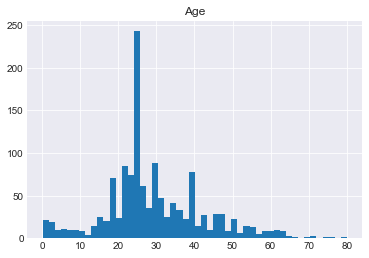

In [16]:

df.hist(column="Age",bins=50)


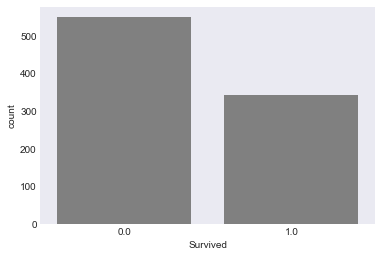

In [33]:

sns.countplot(x="Survived", data=traindf, color="grey")


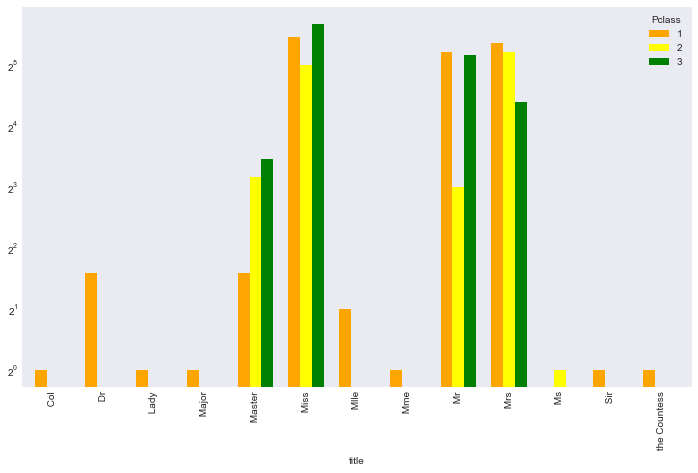

In [18]:

svd = traindf[traindf.Survived == 1]
title = pd.crosstab([svd.title],[svd.Pclass])
title.plot(kind="bar",stacked = False,width = .7, figsize = (12,7),color=["Orange","yellow","green"],grid = False,label="Survived : Title Bracket against Pclass")
plt.yscale('log',basey=2)


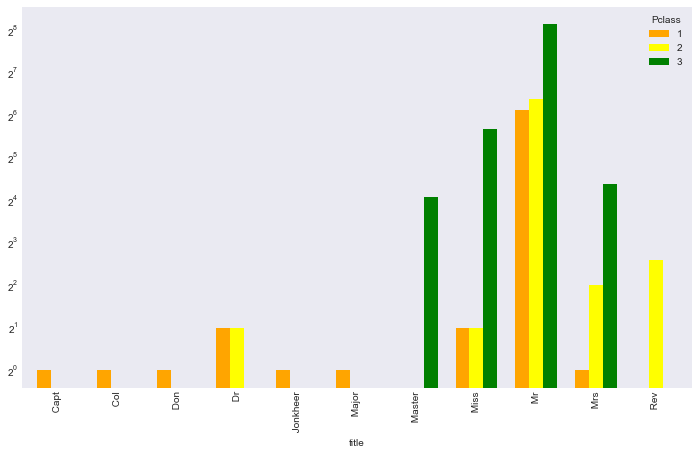

In [19]:

svd = traindf[traindf.Survived == 0]
title = pd.crosstab([svd.title],[svd.Pclass])
title.plot(kind="bar",stacked = False,width = .7, figsize = (12,7),color=["Orange","yellow","green"],grid = False,label="Dead : Title Bracket against Pclass")
plt.yscale('log',basey=2)


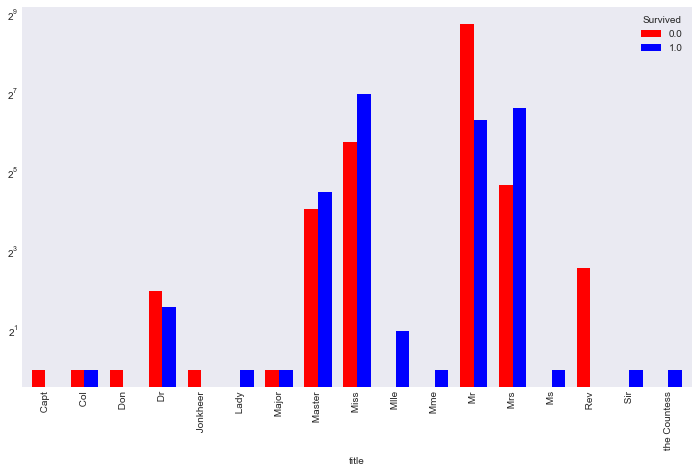

In [20]:

title = pd.crosstab([traindf.title],[traindf.Survived])
title.plot(kind="bar",stacked = False,width = .7, figsize = (12,7),color=["red","blue"],grid = False,label="Title Bracket against Survived")
plt.yscale('log',basey=2)


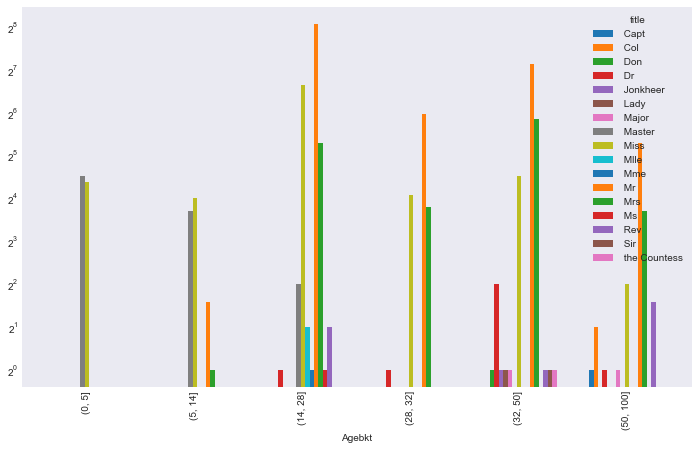

In [21]:

agetitle = pd.crosstab([traindf.Agebkt],[traindf.title])
agetitle.plot(kind="bar",stacked = False,width = .7, figsize = (12,7),grid = False,label="Title Bracket against Survived")
plt.yscale('log',basey=2)


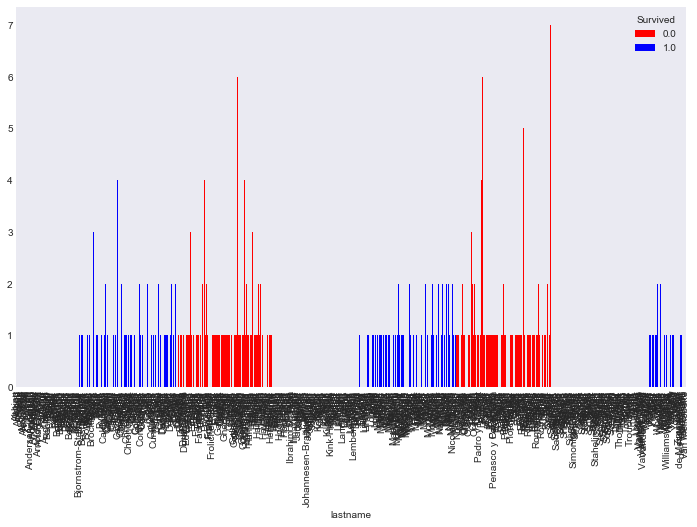

In [22]:

lastname = pd.crosstab([traindf.lastname],[traindf.Survived])
lastname.plot(kind="bar",stacked = False,width = .7, figsize = (12,7),color=["red","blue"],grid = False,label="Title Bracket against Survived")


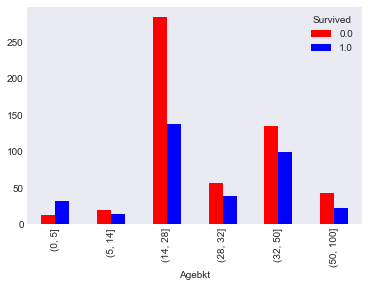

In [23]:

agebkt = pd.crosstab([traindf.Agebkt],[traindf.Survived])
agebkt.plot(kind="bar",stacked = False,color=["red","blue"],grid = False,label="AGE Bracket against Survived")



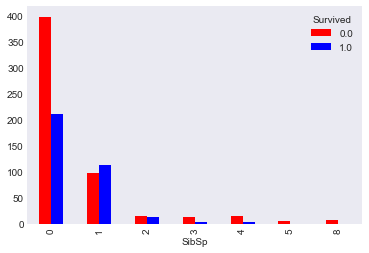

In [24]:
SibSp = pd.crosstab([traindf.SibSp],[traindf.Survived])
SibSp.plot(kind="bar",stacked = False,color=["red","blue"],grid = False,)

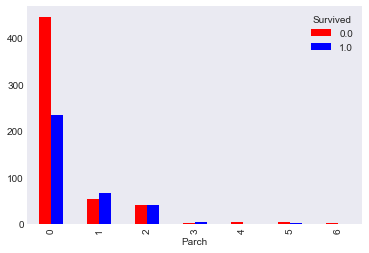

In [25]:

Parch = pd.crosstab([traindf.Parch],[traindf.Survived])
Parch.plot(kind="bar",stacked = False,color=["red","blue"],grid = False,)


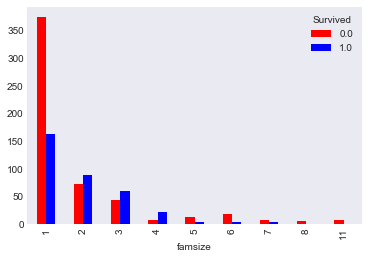

In [26]:

famsize = pd.crosstab([df.famsize],[df.Survived])
famsize.plot(kind="bar",stacked = False,color=["red","blue"],grid = False)


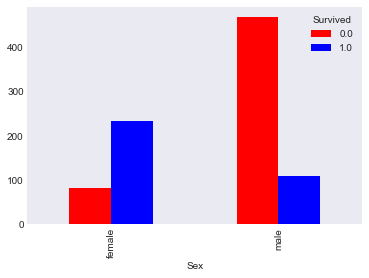

In [27]:

sex = pd.crosstab([df.Sex],[df.Survived])
sex.plot(kind="bar",stacked = False,color=["red","blue"],grid = False,)


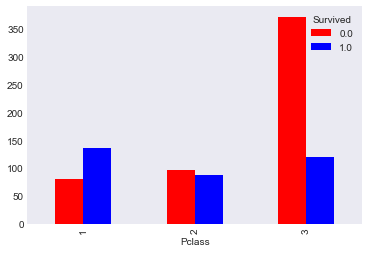

In [28]:

Pclass = pd.crosstab([df.Pclass],[df.Survived])
Pclass.plot(kind="bar",stacked = False,color=["red","blue"],grid = False,)


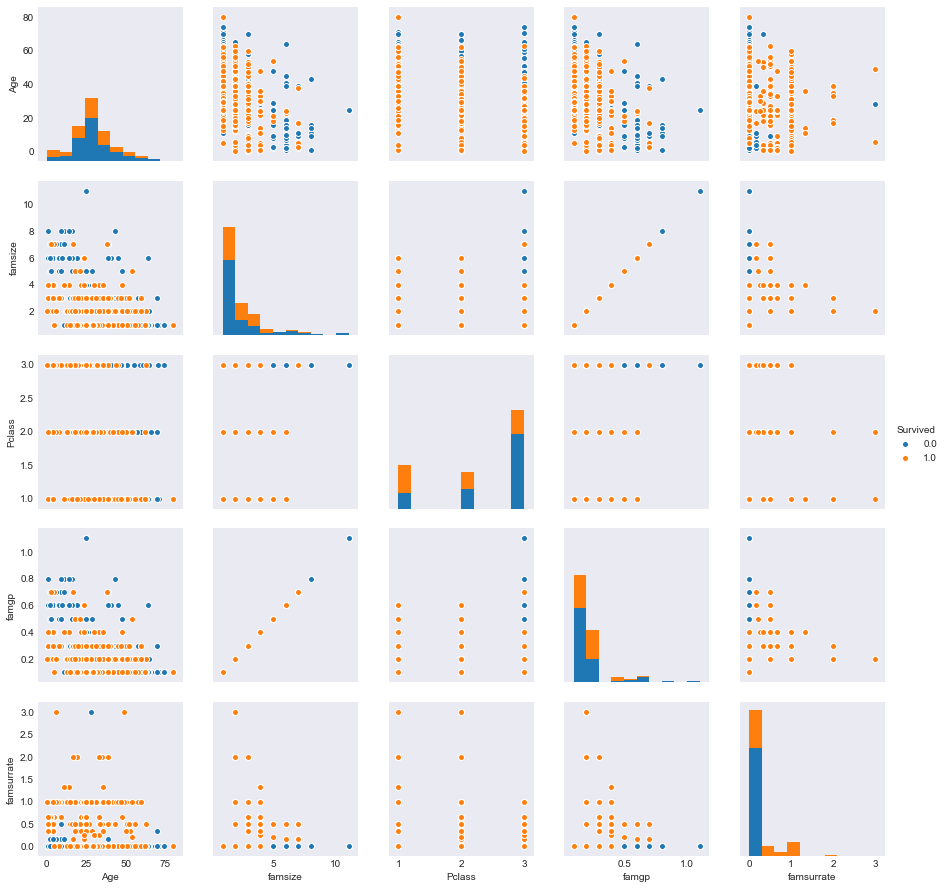

In [29]:

sns.pairplot(df, vars=["Age", "famsize","Pclass","famgp","famsurrate"], hue="Survived")
plt.show()


In [30]:
X_train = traindf[['Child','YA','Adult','Male',  'Female',  'Class1',  'Class2',  'Class3', 'famsurrate','nofam','smlfam','bigfam']] 
X_test = testdf[['Child','YA','Adult','Male',  'Female',  'Class1',  'Class2',  'Class3', 'famsurrate','nofam','smlfam','bigfam']]
Y_train = traindf["Survived"]

print ("Final Features\n")
print X_train.head(10)
print X_test.head(10)
print Y_train.head(10)


Final Features

    Child  YA  Adult  Male  Female  Class1  Class2  Class3  famsurrate  nofam  \
0       0   0      1     1       0       0       0       1    0.000000      0   
1       0   0      1     0       1       1       0       0    1.000000      0   
2       0   0      1     0       1       0       0       1    0.000000      1   
3       0   0      1     0       1       1       0       0    1.000000      0   
4       0   0      1     1       0       0       0       1    0.000000      1   
6       0   0      1     1       0       1       0       0    0.000000      1   
7       1   0      0     1       0       0       0       1    0.000000      0   
8       0   0      1     0       1       0       0       1    1.000000      0   
9       0   1      0     0       1       0       1       0    1.000000      0   
10      1   0      0     0       1       0       0       1    0.666667      0   

    smlfam  bigfam  
0        1       0  
1        1       0  
2        0       0  
3       

In [31]:

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

print logreg.coef_

Y_pred = logreg.predict(X_test)
print logreg.score(X_train, Y_train)

pred = pd.DataFrame(data=Y_pred)
pred.to_csv('C:/Users/gauth/Desktop/Titanic/pred.csv')

Accuracy = {}
scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print scores
accuracy = scores.mean()
print("Logistic Regresion Accuracy :", accuracy)
Accuracy["logisticRegression"] = accuracy



[[ 0.94496178 -0.08590015 -0.28680688 -1.37005507  1.02381146  0.84113822
  -0.25575264 -0.93162918  3.7366254   0.83341845  0.15343948 -1.33310153]]
0.855218855219
[ 0.8547486   0.86592179  0.83707865  0.83707865  0.85875706]
('Logistic Regresion Accuracy :', 0.85071695131582636)


In [32]:

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
pred = pd.DataFrame(data=Y_pred)
pred.to_csv('C:/Users/gauth/Desktop/Titanic/predrandom.csv')
print random_forest.score(X_train, Y_train)

Accuracy = {}
scores = cross_val_score(random_forest, X_train, Y_train, cv=5)
print scores
accuracy = scores.mean()
print("random_forest Accuracy :", accuracy)
Accuracy["random_forest"] = accuracy

0.872053872054
[ 0.87709497  0.88268156  0.83707865  0.84269663  0.87570621]
('random_forest Accuracy :', 0.86305160638019829)
